In [80]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 

In [81]:
import pandas as pd

In [82]:
cwd = os.chdir('/Users/jackcarter/Desktop')

In [83]:
df = pd.read_csv('Potassium_counting_experiment.csv',
                 engine = 'python')

In [84]:
df.head()

,Channel Number,160217c- Am241 Calibration,280217Am- Am241 Spectra on Dspec 50,060217a- KCL 600mg in a greased thin petri dish,080217a- Background,Energy calibration
0,1,0,0,0,0,Linear Model
1,2,0,0,0,0,NaN
2,3,0,0,0,0,m = 0.0017343
3,4,0,0,0,0,c = 0.0117156
4,5,0,0,0,0,y = m*channel number + c


In [85]:
x1 = df['060217a- KCL 600mg in a greased thin petri dish '].values
y1 = df['080217a- Background '].values
chan = df['Channel Number'].values

In [86]:
chan

array([    1,     2,     3, ..., 16382, 16383, 16384])

In [87]:
z1 = x1
z2 = y1
z3 = df['280217Am- Am241 Spectra on Dspec 50'].values
z4 = df['160217c- Am241 Calibration '].values

# Energy Calibration

In [38]:
def energy_cal(channel): 
    m = 0.0017343
    c = 0.0117156
    y = c*channel + m
    return y

Text(0.5, 1.0, 'Calibration')

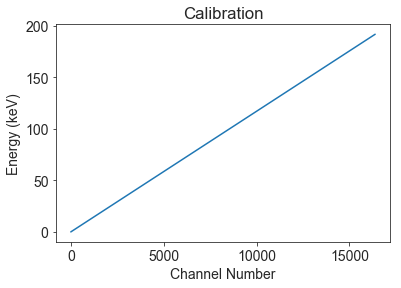

In [39]:
plt.plot(energy_cal(chan))
plt.xlabel('Channel Number')
plt.ylabel('Energy (keV)')
plt.title('Calibration')

In [90]:
energy_ = energy_cal(chan)

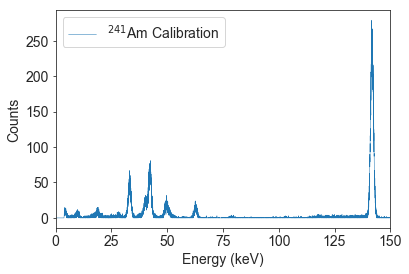

In [94]:
plt.plot(energy_, z4[~np.isnan(z4)], 
         label = '$^{241}$Am Calibration', 
        lw = 0.5)
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.xlim(0, 150)
plt.legend()
#plt.xlim(2000, 5000)

In [95]:
sns.set_style('ticks')
font = {"family": "Arial", 
      "weight": "normal",
      "size": 14}

plt.rc("font", **font)

In [96]:
q = energy_cal(chan)

In [97]:
e1 = q
background = y1
kcl_spectra = x1

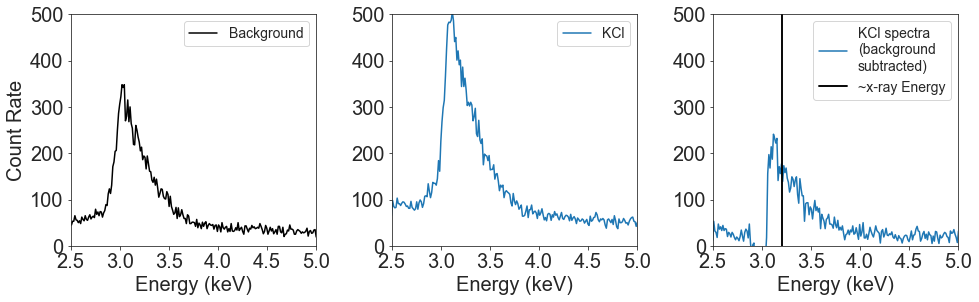

In [98]:
sns.set_style('ticks')
font = {"family": "Arial", 
       "weight": "normal", 
       "size": 20}

plt.rc("font", **font)
fig, ax = plt.subplots(1, 3, figsize = (14, 4.6))
ax[2].plot(e1, x1 - y1, 
          label = 'KCl spectra\n(background\nsubtracted)')
ax[2].set_xlim(2.5, 5)

ax[2].axvline(3.209, color= 'k',lw= 1.9, 
           label = '~x-ray Energy')


ax[0].plot(e1, y1, color = 'k', 
        label = 'Background')
ax[1].plot(e1, x1, 
        label = 'KCl')
ax[0].set_xlim(2.5, 5)
ax[1].set_xlim(2.5, 5)
ax[2].set_xlim(2.5, 5)

ax[0].set_ylim(0, 500)
ax[1].set_ylim(0, 500)
ax[2].set_ylim(0, 500)


ax[2].set_xlabel('Energy (keV)')
ax[1].set_xlabel('Energy (keV)')
ax[0].set_xlabel('Energy (keV)')
ax[0].set_ylabel('Count Rate')

ax[0].locator_params(axis='y', nbins=6)
ax[0].locator_params(axis='x', nbins=8)
ax[1].locator_params(axis='y', nbins=6)
ax[1].locator_params(axis='x', nbins=8)
ax[2].locator_params(axis='y', nbins=6)
ax[2].locator_params(axis='x', nbins=8)
ax[0].legend(fontsize =14)
ax[1].legend(fontsize =14)
ax[2].legend(fontsize =14)

plt.tight_layout()